In [24]:
import spacy
spacy_nlp = spacy.load("en_core_web_sm")

import utility_functions as utils
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from spacy.lang.en.stop_words import STOP_WORDS

importlib.reload(utils)

data = '/Users/borosabel/Documents/Uni/Thesis/PopMIR/Data/Audio/test.json'

custom_stop_words = list(STOP_WORDS)  # Existing stop words
custom_stop_words.extend(["ll", "ve", "'em", "em", "ho", "fo", "ah", "de"])  # Tokens which doesn't really make sense to have them.

In [12]:
df = pd.read_excel('/Users/borosabel/Documents/Uni/Thesis/PopMIR/Data/Excel/baseline_data.xlsx', engine='openpyxl')

In [13]:
# I apply a general cleanup function to the lyrics (Either way it gets preprocessed later with Octis)
df['Lyrics'] = df['Lyrics'].apply(utils.cleanup)

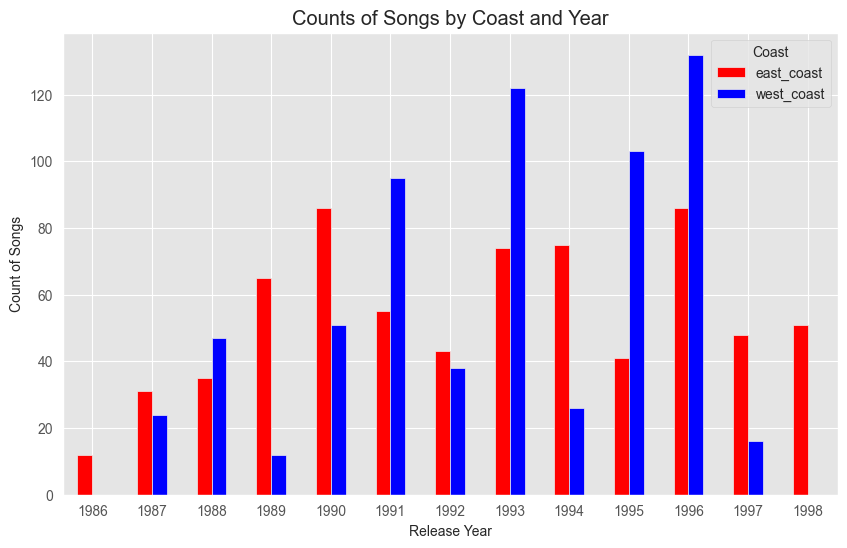

In [23]:
# NUMBER OF SONGS BY RELEASE_YEAR AND COAST
grouped = df.groupby(['Release Year', 'Coast']).size().reset_index(name='Counts')

plt.style.use('ggplot')

# Create a bar plot with custom colors
color_scheme = ['red', 'blue']  # Define your color scheme
pivot_table = grouped.pivot(index='Release Year', columns='Coast', values='Counts')
ax = pivot_table.plot(kind='bar', figsize=(10, 6), color=color_scheme)

# Adding titles and labels
plt.title('Counts of Songs by Coast and Year')
plt.xlabel('Release Year')
plt.ylabel('Count of Songs')
plt.xticks(rotation=0)  # Rotate the x labels for better readability

# Show legend and plot
plt.legend(title='Coast')

# Save the figure
plt.savefig('song_counts_by_coast_and_year.png')  # Saves the plot as a PNG file
plt.show()

In [24]:
# NUMBER OF SONGS BY COAST
grouped = df.groupby(['Coast']).size().reset_index(name='Counts')

In [25]:
grouped

,Coast,Counts
0,east_coast,702
1,west_coast,666


In [29]:
# NUMBER OF DIFFERENT ARTISTS
grouped = df.groupby(['Coast', 'Artist']).size().reset_index(name='Counts')

In [33]:
grouped[grouped['Coast'] == 'east_coast']

,Coast,Artist,Counts
0,east_coast,A Tribe Called Quest,57
1,east_coast,Beastie Boys,64
2,east_coast,Big L,12
3,east_coast,Busta Rhymes,46
4,east_coast,De La Soul,83
5,east_coast,Erik B and Rakim,39
6,east_coast,Gang Starr,58
7,east_coast,Jay-Z,41
8,east_coast,LL cool J,72
9,east_coast,Mobb Deep,32


In [34]:
grouped[grouped['Coast'] == 'west_coast']

,Coast,Artist,Counts
16,west_coast,Coolio,49
17,west_coast,Cypress Hill,44
18,west_coast,Digital Underground,47
19,west_coast,Dr.Dre,25
20,west_coast,Eazy-E,33
21,west_coast,Ice Cube,55
22,west_coast,Ice-T,98
23,west_coast,Luniz,14
24,west_coast,N.W.A,41
25,west_coast,Pac,87


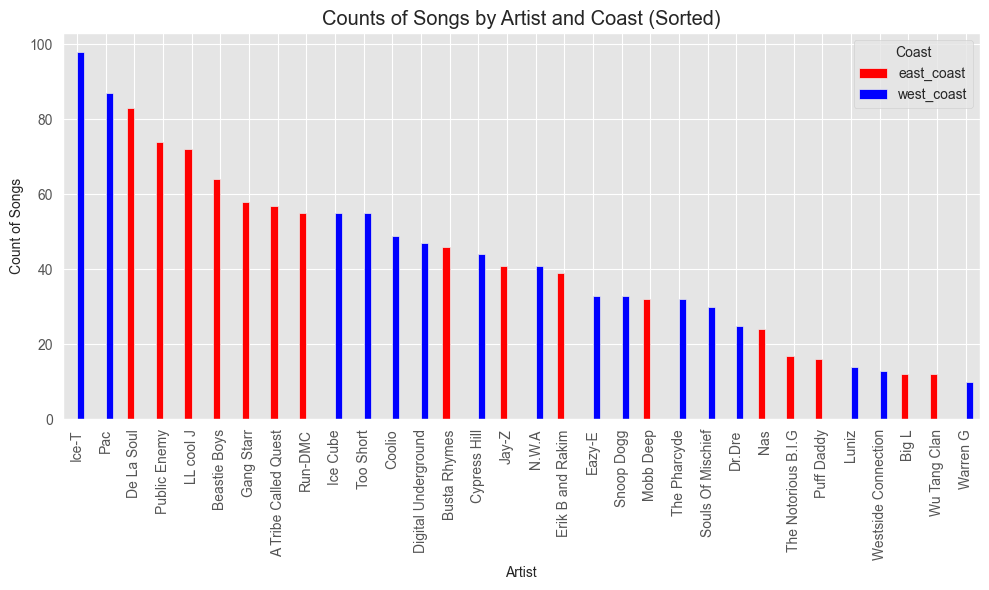

In [43]:
grouped = df.groupby(['Artist', 'Coast']).size().reset_index(name='Counts')
pivot_table = grouped.pivot(index='Artist', columns='Coast', values='Counts')

pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table_sorted = pivot_table.sort_values(by='Total', ascending=False)
pivot_table_sorted = pivot_table_sorted.drop(columns=['Total'])

ax = pivot_table_sorted.plot(kind='bar', figsize=(10, 6), color=['red', 'blue'])

# Add plot title and labels
plt.title('Counts of Songs by Artist and Coast (Sorted)')
plt.xlabel('Artist')
plt.ylabel('Count of Songs')
plt.xticks(rotation=90)  # Rotate artist names for better visibility

# Add a legend to the plot
plt.legend(title='Coast', loc='upper right')
plt.tight_layout()  # Adjust layout

# Save the figure with appropriate bounding box settings
plt.savefig('sorted_song_counts_by_artist_and_coast.png', bbox_inches='tight')

# Display the plot
plt.show()

In [14]:
df['Lyrics_Length'] = df['Lyrics'].apply(len)

In [15]:
df

,Artist,Album,Song,Coast,Release Year,Tempo1,Tempo2,Duration (s),Sample Rate (Hz),Path,Lyrics,Lyrics_Length
0,Big L,Lifestylez Ov Da Poor and Dangerous,8 Iz Enuff.mp3,east_coast,1995,96.774194,48.000000,298.840000,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,yeah my crew be in the house terra herb mcgruf...,5173
1,Big L,Lifestylez Ov Da Poor and Dangerous,Da Graveyard.mp3,east_coast,1995,93.750000,46.511628,323.760000,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,it be the number one crew in the area big l be...,5447
2,Big L,Lifestylez Ov Da Poor and Dangerous,I Don't Understand It.mp3,east_coast,1995,93.750000,47.244094,260.226667,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,there be too many mc 's who be overrate yeah a...,2672
3,Big L,Lifestylez Ov Da Poor and Dangerous,"No Endz, No Skinz.mp3",east_coast,1995,100.000000,50.420168,208.733333,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,let I get to the point real quick when yeah po...,2638
4,Big L,Lifestylez Ov Da Poor and Dangerous,MVP.mp3,east_coast,1995,86.956522,43.478261,218.866667,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,a yeah spark up the phillie and pass the stout...,1869
...,...,...,...,...,...,...,...,...,...,...,...,...
1363,Dr.Dre,The Chronic,Dr. Dre - The Day the Niggaz Took Over (feat. ...,west_coast,1992,93.750000,46.875000,273.206000,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,I be a say this and I be a end mine if yeah be...,4762
1364,Dr.Dre,The Chronic,"Dr. Dre - Bitches Ain't Shit (feat. Jewell, Sn...",west_coast,1992,92.307692,46.153846,287.207625,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,bitch be not shit but hoe and trick bitch be n...,4139
1365,Dr.Dre,The Chronic,Dr. Dre - Stranded On Death Row (feat. Bushwic...,west_coast,1992,90.909091,45.801527,287.335333,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,yes it be I say I and all who agree be more th...,4092
1366,Dr.Dre,The Chronic,Dr. Dre - Nuthin' but a ＂G＂ Thang (feat. Snoop...,west_coast,1992,95.238095,47.244094,238.677917,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,one two three and to the four snoop doggy dogg...,3602


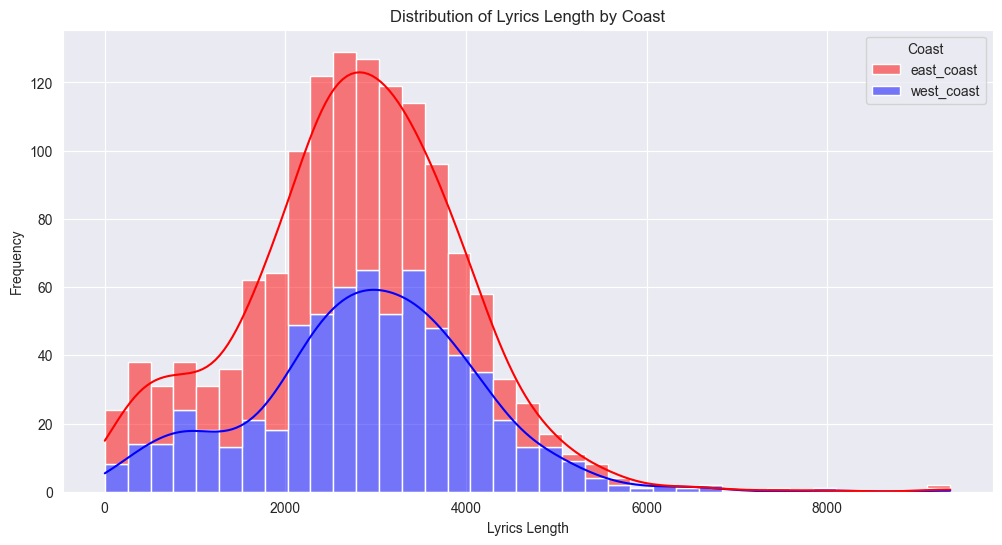

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Lyrics_Length', hue='Coast', kde=True, multiple="stack",
             palette={'east_coast': 'red', 'west_coast': 'blue'})  # Custom colors
plt.title('Distribution of Lyrics Length by Coast')
plt.xlabel('Lyrics Length')
plt.ylabel('Frequency')

plt.savefig('lyrics_length_distribution.png')
plt.show()

In [25]:
# Average east coast lyrics length:
np.mean(df[df['Coast'] == 'east_coast']['Lyrics_Length'])

2621.405982905983

In [26]:
# Average west coast lyrics length:
np.mean(df[df['Coast'] == 'west_coast']['Lyrics_Length'])

2913.6306306306305

In [40]:
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

custom_stop_words = ['yeah', 'oh', 'like', 'just', 'know', 'got', 'gonna', 'na', 'ain', 'cause', 'let', 'get']
stop_words.update(custom_stop_words)

def tokenize_lyrics(lyrics):
    # Convert to lowercase to ensure uniformity
    tokens = word_tokenize(lyrics.lower())
    # Remove stopwords and non-alphabetic tokens
    words = [word for word in tokens if word.isalpha() and word not in stop_words]
    return words

# Apply the tokenization to each row
df['Tokens'] = df['Lyrics'].apply(tokenize_lyrics)

# Function to count words by coast
def count_words(df, coast):
    # Concatenate all lists of tokens from the given coast into a single list
    words = sum(df[df['Coast'] == coast]['Tokens'].tolist(), [])
    # Count the words and return the most common ones
    return Counter(words).most_common(10)

# Get the top 10 words for each coast
east_words = count_words(df, 'east_coast')
west_words = count_words(df, 'west_coast')

print("East Coast Top Words:", east_words)
print("West Coast Top Words:", west_words)

[nltk_data] Downloading package punkt to /Users/borosabel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/borosabel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


East Coast Top Words: [('go', 2308), ('nigga', 1913), ('make', 1460), ('one', 1374), ('man', 1350), ('come', 1303), ('say', 1214), ('shit', 1089), ('time', 1042), ('see', 1014)]
West Coast Top Words: [('nigga', 3372), ('go', 2181), ('shit', 1631), ('bitch', 1557), ('fuck', 1537), ('say', 1445), ('see', 1382), ('make', 1355), ('come', 1198), ('man', 1186)]


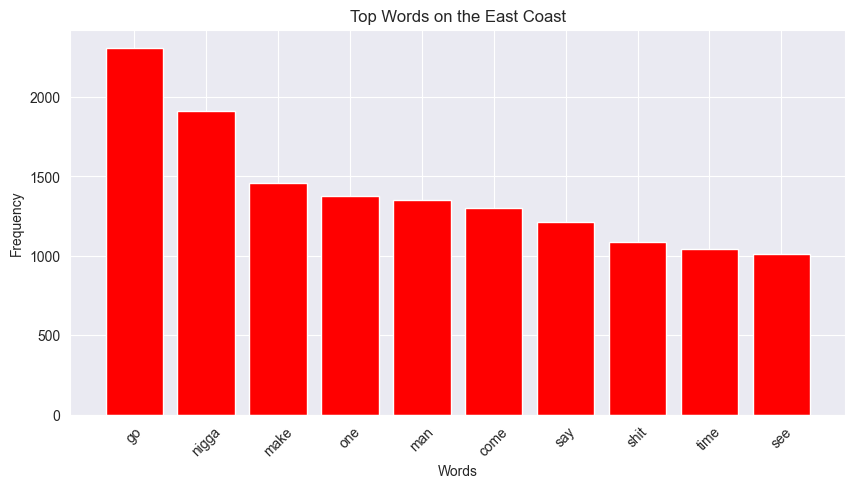

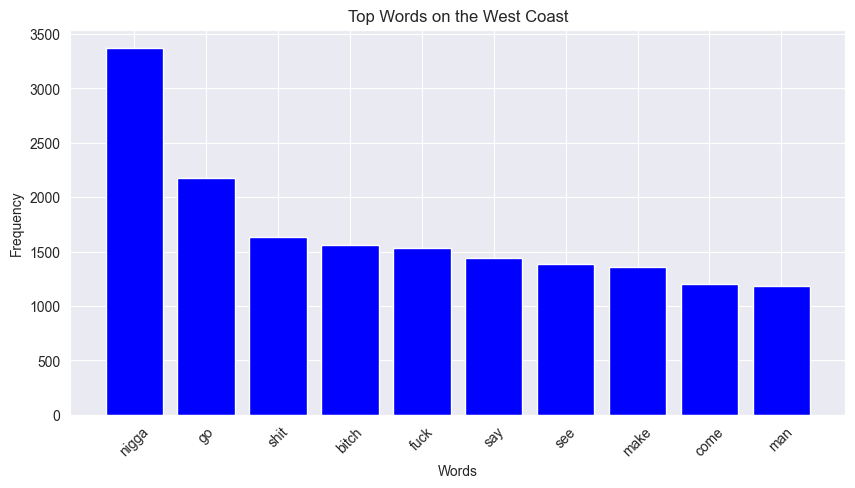

In [41]:
def plot_word_frequencies(word_frequencies, title, color, filename):
    # Unpack words and their frequencies
    words, frequencies = zip(*word_frequencies)

    # Create figure and axis
    plt.figure(figsize=(10, 5))
    plt.bar(words, frequencies, color=color)
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate labels to avoid overlap

    # Save the plot to a file
    plt.savefig(filename, format='png', bbox_inches='tight')  # Adjust format as needed

    # Display the plot
    plt.show()


plot_word_frequencies(east_words, 'Top Words on the East Coast', 'red', 'east_coast_words_freq.png')
plot_word_frequencies(west_words, 'Top Words on the West Coast', 'blue', 'west_coast_words_freq.png')